<a href="https://colab.research.google.com/github/zukol/dw_3miasto_project/blob/master/lento_data_review.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np


In [3]:
cd '/content/drive/My Drive/Colab Notebooks/dw_3miasto/data'

/content/drive/My Drive/Colab Notebooks/dw_3miasto/data


In [4]:
ls

data.json


In [5]:
df = pd.read_json('data.json')
df = df.T
df.head()

,data,cena,cena_za_metr,liczba_zdjec,tytul,adres,wysweitlenia,kategoria,powierzchnia,liczba-pokoi,zabudowa,pietro,liczba-pieter,rynek,rok-budowy,tech-budowy,stan,forma-kuchni,pow-dodatkowa,numer-ksiegi-wieczystej
1.0,"Dodane: Środa, 20 Maj, 2020 14:33",587 000 zł 4622 zł/m2,4622,1/7,"Mieszkanie Gdynia Pogórze, Suchy Dwór, Sowia",Gdynia / Pogórze,7,Mieszkania / Sprzedaż,127 m2,4 pokoje,Inne,1 piętro,1 piętrowy,Wtórny,2020,NaN,NaN,NaN,NaN,NaN
2.0,"Dodane: Środa, 20 Maj, 2020 11:18",699 000 zł 8738 zł/m2,8738,1/5,Sprzedam mieszkanie w Sopocie,Sopot / Centrum,1036,Mieszkania / Sprzedaż,80 m2,3 pokoje,Kamienica,2 piętro,3 piętrowy,Pierwotny,NaN,Cegła,Do odświeżenia,Oddzielna,"Balkon, Piwnica",NaN
4.0,"Dodane: Środa, 20 Maj, 2020 10:33",845 840 zł 10985 zł/m2,10985,1/4,"Wolności 18, Gdynia, apartament na I piętrze",Gdynia / Działki Leśne,81,Mieszkania / Sprzedaż,77 m2,4 pokoje,Apartamentowiec,1 piętro,3 piętrowy,Pierwotny,2020,Silikat,NaN,Aneks,"Balkon, Winda, Miejsce parkingowe",NaN
8.0,"Dodane: Środa, 20 Maj, 2020 10:33",599 000 zł 11302 zł/m2,11302,1/7,"WOLNOŚCI 18 Gdynia, apartament na I PIĘTRZE",Gdynia / Działki Leśne,88,Mieszkania / Sprzedaż,53 m2,3 pokoje,Apartamentowiec,1 piętro,3 piętrowy,Pierwotny,2020,Silikat,NaN,Aneks,"Balkon, Winda, Miejsce parkingowe",NaN
16.0,"Dodane: Wtorek, 19 Maj, 2020 22:09",519 000 zł 7014 zł/m2,7014,1/8,"Mieszkanie Gdańsk Osowa, Kielnieńska",Gdańsk / Osowa,14,Mieszkania / Sprzedaż,74 m2,3 pokoje,Blok,3 piętro,3 piętrowy,Wtórny,2008,NaN,NaN,NaN,NaN,NaN


In [6]:
df.shape

(557, 20)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 557 entries, 1.0 to 2.3587265155134633e+167
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   data                     557 non-null    object
 1   cena                     557 non-null    object
 2   cena_za_metr             557 non-null    object
 3   liczba_zdjec             553 non-null    object
 4   tytul                    557 non-null    object
 5   adres                    557 non-null    object
 6   wysweitlenia             557 non-null    object
 7   kategoria                557 non-null    object
 8   powierzchnia             557 non-null    object
 9   liczba-pokoi             556 non-null    object
 10  zabudowa                 557 non-null    object
 11  pietro                   552 non-null    object
 12  liczba-pieter            548 non-null    object
 13  rynek                    549 non-null    object
 14  rok-budowy        

In [8]:
df['data'].unique()

array(['Dodane: Środa, 20 Maj, 2020 \xa014:33',
       'Dodane: Środa, 20 Maj, 2020 \xa011:18',
       'Dodane: Środa, 20 Maj, 2020 \xa010:33',
       'Dodane: Wtorek, 19 Maj, 2020 \xa022:09',
       'Dodane: Wtorek, 19 Maj, 2020 \xa021:22',
       'Dodane: Wtorek, 19 Maj, 2020 \xa020:52',
       'Dodane: Wtorek, 19 Maj, 2020 \xa020:51',
       'Dodane: Wtorek, 19 Maj, 2020 \xa020:50',
       'Dodane: Wtorek, 19 Maj, 2020 \xa020:40',
       'Dodane: Wtorek, 19 Maj, 2020 \xa018:07',
       'Dodane: Wtorek, 19 Maj, 2020 \xa016:17',
       'Dodane: Wtorek, 19 Maj, 2020 \xa016:07',
       'Dodane: Wtorek, 19 Maj, 2020 \xa014:41',
       'Dodane: Wtorek, 19 Maj, 2020 \xa012:58',
       'Dodane: Wtorek, 19 Maj, 2020 \xa012:57',
       'Dodane: Wtorek, 19 Maj, 2020 \xa012:29',
       'Dodane: Wtorek, 19 Maj, 2020 \xa009:39',
       'Dodane: Wtorek, 19 Maj, 2020 \xa009:37',
       'Dodane: Wtorek, 19 Maj, 2020 \xa008:50',
       'Dodane: Wtorek, 19 Maj, 2020 \xa007:45',
       'Dodane: Wtorek,

In [9]:
df['godzina'] = df['data'].map(lambda x: ' '.join(x.split(' ')[5:])) #tworze nowa kolumne z godzina
df['data'] = df['data'].map(lambda x: ' '.join(x.split(' ')[2:-1])) #usuwam zbedne wyrazy z kolumny data
df['data'] = df['data'].str.replace(',', '') #usuwam z daty ,
df['cena'] = df['cena'].map(lambda x: ''.join(x.split(' ')[:-3])) #usuwam z kolumny cena 3 ostatnie slowa czyli zl/m2, cena za metr i zl oraz usuwam spacje
df['cena_za_metr'] = df['cena_za_metr'].astype(float)
df['liczba_zdjec'] = df['liczba_zdjec'].str.replace('1/', '')
df['dzielnica'] = df['adres'].map(lambda x: '/'.join(x.split('/')[1:])).str.lower()
df['adres'] = df['adres'].str.lower().str.split('/').str[0]
df['powierzchnia'] = df['powierzchnia'].str.replace('m2', '')



df.head(2)

,data,cena,cena_za_metr,liczba_zdjec,tytul,adres,wysweitlenia,kategoria,powierzchnia,liczba-pokoi,zabudowa,pietro,liczba-pieter,rynek,rok-budowy,tech-budowy,stan,forma-kuchni,pow-dodatkowa,numer-ksiegi-wieczystej,godzina,dzielnica
1.0,20 Maj 2020,587000,4622.0,7,"Mieszkanie Gdynia Pogórze, Suchy Dwór, Sowia",gdynia,7,Mieszkania / Sprzedaż,127,4 pokoje,Inne,1 piętro,1 piętrowy,Wtórny,2020,NaN,NaN,NaN,NaN,NaN,14:33,pogórze
2.0,20 Maj 2020,699000,8738.0,5,Sprzedam mieszkanie w Sopocie,sopot,1036,Mieszkania / Sprzedaż,80,3 pokoje,Kamienica,2 piętro,3 piętrowy,Pierwotny,NaN,Cegła,Do odświeżenia,Oddzielna,"Balkon, Piwnica",NaN,11:18,centrum


In [10]:
df['data'].unique()

array(['20 Maj 2020', '19 Maj 2020', '18 Maj 2020', '17 Maj 2020',
       '16 Maj 2020', '15 Maj 2020', '14 Maj 2020', '13 Maj 2020',
       '12 Maj 2020', '11 Maj 2020', '10 Maj 2020', '09 Maj 2020',
       '08 Maj 2020', '07 Maj 2020', '06 Maj 2020', '05 Maj 2020',
       '04 Maj 2020', '03 Maj 2020', '02 Maj 2020', '01 Maj 2020',
       '30 Kwiecień 2020', '29 Kwiecień 2020', '28 Kwiecień 2020',
       '27 Kwiecień 2020', '26 Kwiecień 2020', '24 Kwiecień 2020',
       '23 Kwiecień 2020', '22 Kwiecień 2020', '21 Kwiecień 2020',
       '20 Kwiecień 2020', '19 Kwiecień 2020', '17 Kwiecień 2020',
       '16 Kwiecień 2020', '15 Kwiecień 2020', '14 Kwiecień 2020',
       '12 Kwiecień 2020', '11 Kwiecień 2020', '09 Kwiecień 2020',
       '08 Kwiecień 2020', '07 Kwiecień 2020', '06 Kwiecień 2020',
       '04 Kwiecień 2020', '03 Kwiecień 2020', '02 Kwiecień 2020',
       '01 Kwiecień 2020', '31 Marzec 2020', '30 Marzec 2020',
       '29 Marzec 2020', '27 Marzec 2020', '26 Marzec 2020',
     

In [11]:
df['liczba_zdjec'].unique()

array(['7', '5', '4', '8', '16', '10', '6', '12', '3', '2', '9', '15',
       '13', '14', '11', None], dtype=object)

In [12]:
df['adres'].unique()

array(['gdynia ', 'sopot ', 'gdańsk ', 'gdańsk', 'sopot', 'gdynia',
       'gdynia pokaż na mapie', 'gdańsk pokaż na mapie'], dtype=object)

In [13]:
df['kategoria'].unique()

array(['Mieszkania / Sprzedaż'], dtype=object)

In [14]:
df['powierzchnia'].unique()

array(['127 ', '80 ', '77 ', '53 ', '74 ', '50 ', '47 ', '98 ', '89 ',
       '140 ', '51 ', '41 ', '45 ', '115 ', '90 ', '64 ', '71 ', '73 ',
       '168 ', '72 ', '69 ', '105 ', '68 ', '70 ', '56 ', '49 ', '103 ',
       '92 ', '31 ', '131 ', '128 ', '95 ', '57 ', '35 ', '102 ', '134 ',
       '76 ', '93 ', '88 ', '40 ', '52 ', '144 ', '99 ', '55 ', '60 ',
       '54 ', '96 ', '42 ', '30 ', '66 ', '59 ', '119 ', '67 ', '62 ',
       '43 ', '58 ', '27 ', '87 ', '61 ', '33 ', '28 ', '48 ', '37 ',
       '38 ', '26 ', '46 ', '86 ', '107 ', '130 ', '63 ', '100 ', '32 ',
       '101 ', '94 ', '75 ', '111 ', '120 ', '91 ', '81 ', '7900 ',
       '108 ', '29 ', '44 ', '83 ', '169 ', '36 ', '65 ', '112 ', '84 ',
       '145 ', '25 ', '34 ', '82 ', '79 ', '109 ', '85 ', '123 ', '24 ',
       '78 ', '39 ', '129 ', '196 ', '122 ', '126 ', '113 ', '18 '],
      dtype=object)

In [15]:
df['liczba-pokoi'].unique()

array(['4 pokoje ', '3 pokoje ', '2 pokoje ', '5 i więcej ', '1 pokój ',
       nan], dtype=object)

In [16]:
df['zabudowa'].unique()

array(['Inne ', 'Kamienica ', 'Apartamentowiec ', 'Blok ', 'Dom '],
      dtype=object)

In [17]:
df['pietro'].unique()

array(['1 piętro ', '2 piętro ', '3 piętro ', 'Parter ', '4 piętro ',
       '5 piętro ', '9 piętro ', '8 piętro ', '6 piętro ', '> 10 piętro ',
       '10 piętro ', 'Suterena ', nan, '7 piętro '], dtype=object)

In [18]:
df['liczba-pieter'].unique()

array(['1 piętrowy ', '3 piętrowy ', 'Wieżowiec ', '4 piętrowy ',
       '2 piętrowy ', '5 piętrowy ', nan, 'Parterowy '], dtype=object)

In [19]:
df['rynek'].unique()

array(['Wtórny ', 'Pierwotny ', nan], dtype=object)

In [20]:
df['rok-budowy'].unique()

array(['2020 ', nan, '2008 ', '1961 ', '1950 ', '2009 ', '1934 ', '2005 ',
       '2018 ', '2017 ', '2013 ', '2019 ', '2003 ', '1910 ', '1980 ',
       '1990 ', '1960 ', '1962 ', '1920 ', '1966 ', '1995 ', '2006 ',
       '2007 ', '1968 ', '1978 ', '1982 ', '1970 ', '1936 ', '2016 ',
       '1975 ', '1930 ', '2014 ', '1900 ', '1964 ', '1989 ', '2002 ',
       '2021 ', '2015 ', '2012 ', '1955 ', '1996 ', '1984 ', '1963 ',
       '1973 ', '1985 ', '1993 ', '1926 ', '1969 ', '1954 ', '2011 ',
       '1903 ', '1905 ', '1947 ', '1977 ', '2000 ', '1965 ', '2004 ',
       '1959 ', '2010 ', '1967 ', '1953 ', '1901 ', '1987 ', '1998 ',
       '1952 ', '1976 ', '1935 ', '1988 ', '1938 ', '1902 ', '1992 ',
       '1974 ', '1927 ', '1940 ', '1971 '], dtype=object)

In [21]:
df['dzielnica'].unique()

array([' pogórze', ' centrum', ' działki leśne', ' osowa', '', ' orłowo',
       ' śródmieście', ' redłowo', ' chylonia', ' wrzeszcz', ' chełm',
       ' chwarzno-wiczlino', ' przymorze małe', ' brzeźno',
       ' przymorze wielkie pokaż na mapie', ' oliwa pokaż na mapie',
       ' piecki-migowo pokaż na mapie', ' wielki kack', ' olszynka',
       ' gdańsk południe', ' oliwa', ' suchanino', ' piecki-migowo',
       ' brodwino', ' nowy port', ' aniołki', ' leszczynki', ' matarnia',
       ' letnica', ' górny sopot', ' kamienny potok', ' zaspa-młyniec',
       ' grabówek', ' oksywie', ' przymorze wielkie', ' dolny sopot',
       ' obłuże', ' dąbrowa', ' rudniki', ' mały kack', ' karwiny',
       ' siedlce', ' cisowa', ' wyspa sobieszewska', ' stogi z przeróbką',
       ' wzgórze św maksymiliana'], dtype=object)

In [0]:
# months_dict = {
#     'Styczeń' : '01',
#     'Luty' : '02',
#     'Marzec' : '03',
#     'Kwiecień' : '04',
#     'Maj' : '05',
#     'Czerwiec' : '06',
#     'Lipiec' : '07',
#     'Sierpień' : '08',
#     'Wrzesień' : '09',
#     'Październik' : '10',
#     'Listopad' : '11',
#     'Grudzień' : '12',
# }

# pd.to_datetime(df['data'], format='%d %m %y')
# df.head(2)

In [0]:
df = df.rename(columns={'liczba_zdjec': 'zdjecie',
                        'liczba-pokoi': 'liczba_pokoi',
                        'liczba-pieter': 'liczba_pieter_budynku',
                        'zabudowa': 'rodzaj_zabudowy',
                        'rok-budowy': 'rok_budowy',
                        'forma-kuchni': 'kuchnia'})

In [24]:
df['cena'].median

<bound method Series.median of 1.000000e+00      587000
2.000000e+00      699000
4.000000e+00      845840
8.000000e+00      599000
1.600000e+01      519000
                  ...   
1.474204e+166     457100
2.948408e+166    1590000
5.896816e+166     347000
1.179363e+167     355000
2.358727e+167     483000
Name: cena, Length: 557, dtype: object>

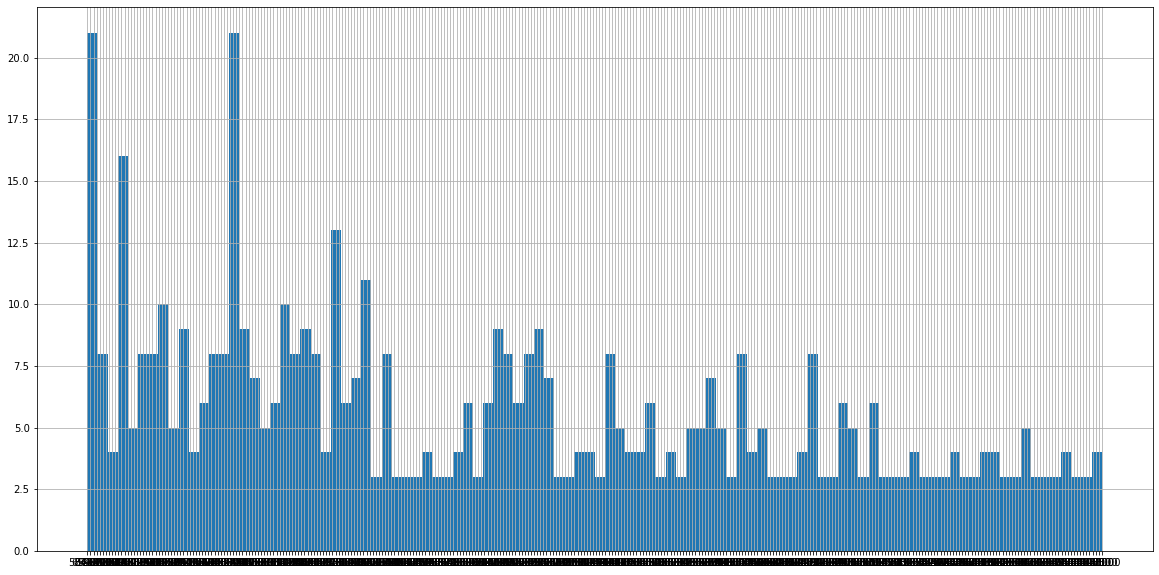

In [25]:
df['cena'].hist(bins=100, figsize=(20,10));

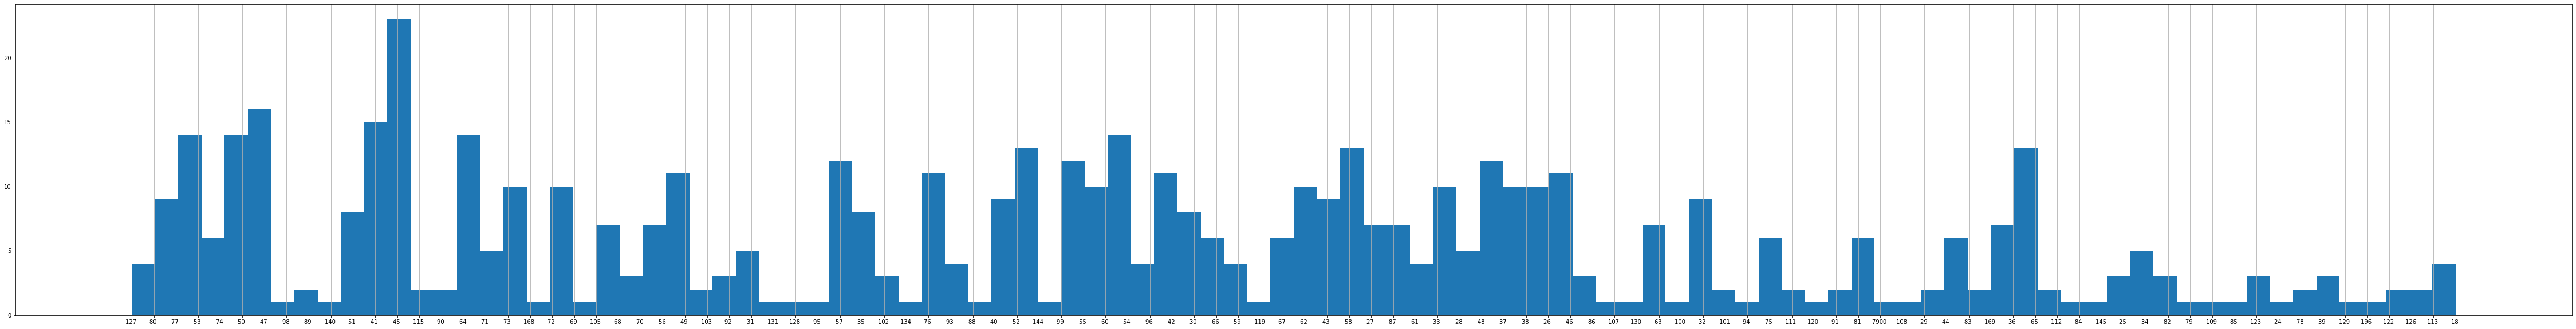

In [26]:
df['powierzchnia'].hist(bins=100, figsize=(80,10));

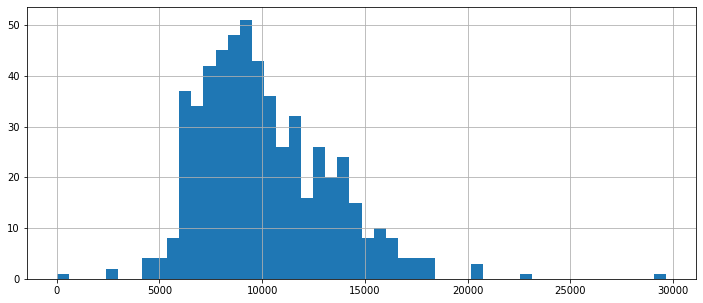

In [27]:
df['cena_za_metr'].hist(bins=50, figsize=(12,5));

In [28]:
df[df.cena_za_metr < 3000]

,data,cena,cena_za_metr,zdjecie,tytul,adres,wysweitlenia,kategoria,powierzchnia,liczba_pokoi,rodzaj_zabudowy,pietro,liczba_pieter_budynku,rynek,rok_budowy,tech-budowy,stan,kuchnia,pow-dodatkowa,numer-ksiegi-wieczystej,godzina,dzielnica
2.008673e+59,06 Maj 2020,282741,36.0,5,"Mieszkanie Gdynia Oksywie, Inż. J. Śmidowicza",gdynia,48,Mieszkania / Sprzedaż,7900,2 pokoje,Blok,3 piętro,3 piętrowy,Wtórny,NaN,NaN,NaN,NaN,NaN,NaN,10:40,oksywie
2.745919e+157,28 Luty 2020,260000,2989.0,8,MIESZKANIE Z WIDOKIEM NA MORZE,sopot,135,Mieszkania / Sprzedaż,87,4 pokoje,Blok,4 piętro,NaN,Wtórny,NaN,Cegła,Świeżo po remoncie,Oddzielna,NaN,NaN,13:11,dolny sopot
4.606888e+164,archiwalne! Wygasło: Sobota 02 Maj 2020,140000,2745.0,None,Sprzedam swoją część mieszkania w Gdańsku,gdańsk,296,Mieszkania / Sprzedaż,51,3 pokoje,Blok,1 piętro,4 piętrowy,Pierwotny,NaN,Inne,NaN,Aneks,NaN,NaN,"Sobota, 02 Maj, 2020 20:08",wrzeszcz


In [29]:
df[df.cena_za_metr > 20000]

,data,cena,cena_za_metr,zdjecie,tytul,adres,wysweitlenia,kategoria,powierzchnia,liczba_pokoi,rodzaj_zabudowy,pietro,liczba_pieter_budynku,rynek,rok_budowy,tech-budowy,stan,kuchnia,pow-dodatkowa,numer-ksiegi-wieczystej,godzina,dzielnica
6.553600e+04,19 Maj 2020,1450000,20423.0,16,"Mieszkanie Gdańsk gm. GDANSK STARÓWKA, Targ Rybny",gdańsk,196,Mieszkania / Sprzedaż,71,2 pokoje,Apartamentowiec,4 piętro,4 piętrowy,Wtórny,2009,NaN,NaN,NaN,NaN,NaN,20:52,
2.097152e+06,19 Maj 2020,1450000,20423.0,16,perła wśród apartamentów Gdańsk 70m widok Motławę,gdańsk,255,Mieszkania / Sprzedaż,71,2 pokoje,Apartamentowiec,5 piętro,3 piętrowy,Wtórny,2009,Inne,NaN,NaN,Balkon,NaN,20:52,śródmieście
1.342177e+08,19 Maj 2020,1450000,20423.0,16,"Mieszkanie Gdańsk gm. GDANSK Stare Miasto, Tar...",gdańsk,120,Mieszkania / Sprzedaż,71,2 pokoje,Apartamentowiec,4 piętro,4 piętrowy,Wtórny,2009,NaN,NaN,NaN,NaN,NaN,20:52,
1.915619e+53,09 Maj 2020,1400000,22581.0,None,Sprzedaż nieszkania (odrębna własność),sopot,690,Mieszkania / Sprzedaż,62,3 pokoje,Blok,NaN,NaN,NaN,NaN,NaN,Świeżo po remoncie,Oddzielna,NaN,NaN,23:40,kamienny potok
5.653911e+73,01 Maj 2020,4299000,29648.0,16,"Mieszkanie Gdańsk Jelitkowo, ul. Wypoczynkowa",gdańsk,456,Mieszkania / Sprzedaż,145,4 pokoje,Blok,1 piętro,3 piętrowy,Wtórny,2018,Inne,NaN,NaN,Balkon,NaN,10:10,


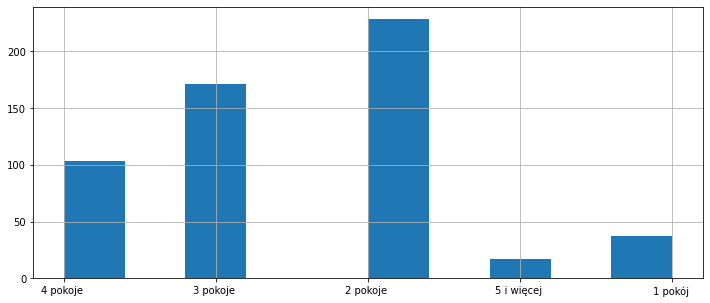

In [31]:
df['liczba_pokoi'].hist(bins=10, figsize=(12,5));

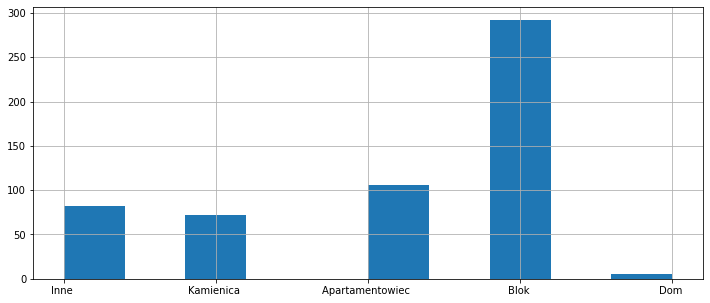

In [33]:
df['rodzaj_zabudowy'].hist(bins=10, figsize=(12,5));

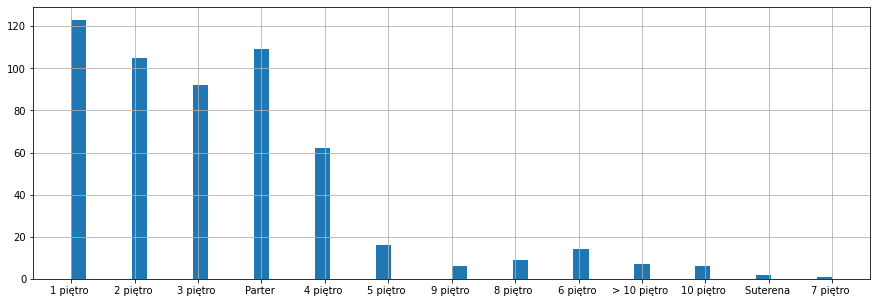

In [34]:
df['pietro'].hist(bins=50, figsize=(15,5));

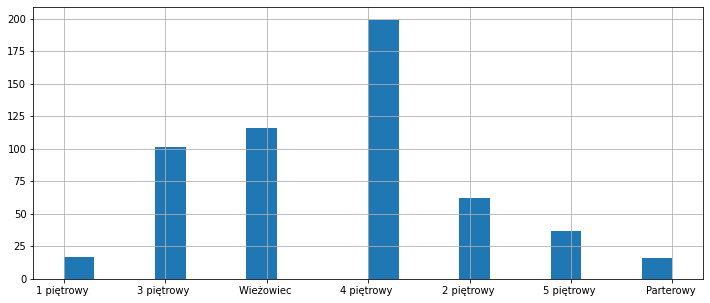

In [37]:
df['liczba_pieter_budynku'].hist(bins=20, figsize=(12,5));

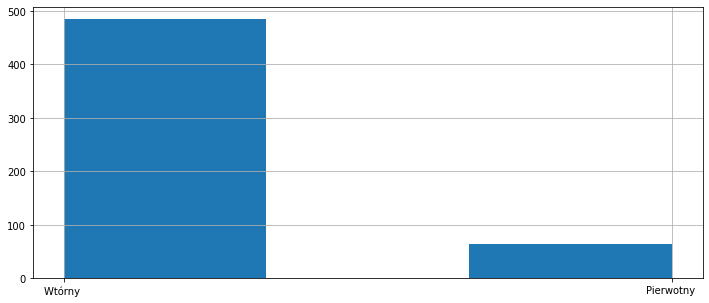

In [38]:
df['rynek'].hist(bins=3, figsize=(12,5));

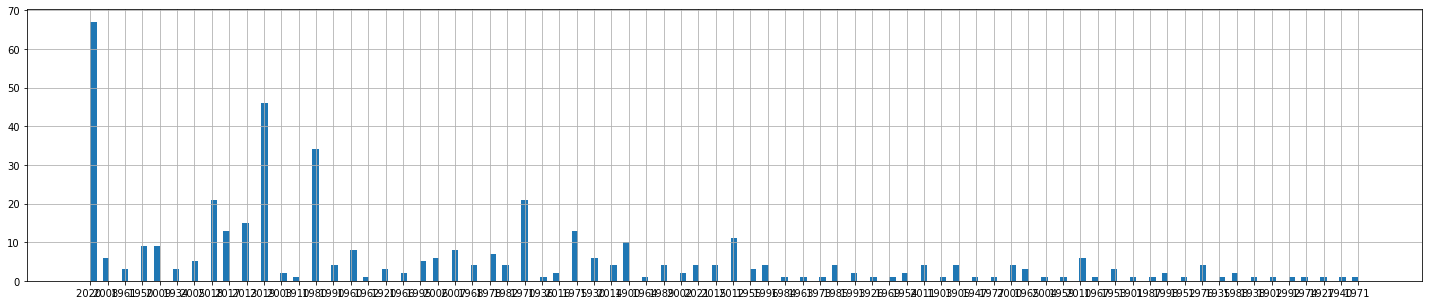

In [40]:
df['rok_budowy'].hist(bins=200, figsize=(25,5));

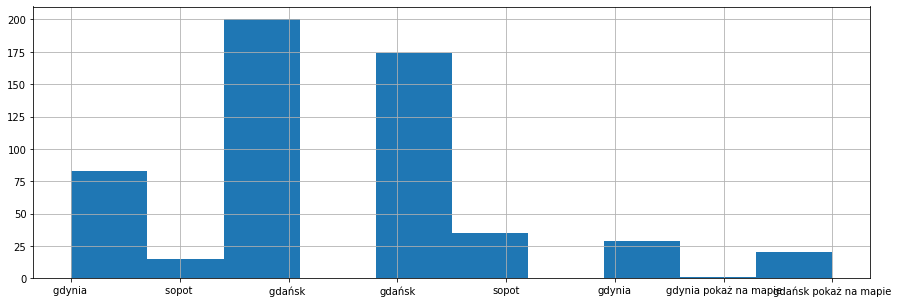

In [45]:
df.adres.hist(figsize=(15,5));